# MatKit `Mesh` and `OneArray` Examples

This notebook demonstrates how to use the `Mesh` and `OneArray` classes for FEM with natural 1-based indexing.

## Why 1-Based Indexing?

In FEM textbooks and mathematical notation, nodes and elements are numbered starting from 1, not 0. The `Mesh` and `OneArray` classes bridge the gap between mathematical conventions and Python's 0-based arrays, allowing you to:

- Use node/element numbers as they appear in textbooks (1, 2, 3, ...)
- Avoid mental translation (`mesh.nodes[3]` means node 3, not node 4!)
- Write clearer, more maintainable FEM code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mechanicskit import Mesh, OneArray, patch

%matplotlib inline

## Part 1: OneArray Basics

`OneArray` is a simple wrapper that makes arrays use 1-based indexing, perfect for storing per-element or per-node results.

### Example 1: Creating and Accessing OneArray

In [2]:
# Element forces for 5 elements
forces = OneArray([6052.76, -5582.25, -7274.51, 6380.16, -9912.07])

print("Force in element 1:", forces[1])      # First element
print("Force in element 3:", forces[3])      # Third element
print("Force in element 5:", forces[5])      # Last element

# Access multiple elements
print("\nForces in elements 1, 3, 5:")
print(forces[[1, 3, 5]])

Force in element 1: 6052.76
Force in element 3: -7274.51
Force in element 5: -9912.07

Forces in elements 1, 3, 5:
[ 6052.76 -7274.51 -9912.07]


### Example 2: Modifying OneArray Values

In [3]:
# Modify element 1 force
forces[1] = 7000.0
print("Updated force in element 1:", forces[1])

# Modify multiple elements
forces[[2, 4]] = [-6000.0, 6500.0]
print("\nAll forces after modification:")
print(forces)

Updated force in element 1: 7000.0

All forces after modification:
OneArray([ 7000.   -6000.   -7274.51  6500.   -9912.07])


### Example 3: OneArray Arithmetic

In [4]:
# Create stress array
areas = OneArray([100, 100, 120, 100, 150])  # mm²
forces_new = OneArray([6052.76, -5582.25, -7274.51, 6380.16, -9912.07])  # N

# Calculate stresses (force / area)
stresses = forces_new / areas  # Element-wise division

print("Stress in element 1:", stresses[1], "MPa")
print("Stress in element 5:", stresses[5], "MPa")
print("\nAll stresses:")
print(stresses)

Stress in element 1: 60.5276 MPa
Stress in element 5: -66.08046666666667 MPa

All stresses:
OneArray([ 60.5276     -55.8225     -60.62091667  63.8016     -66.08046667])


### Example 4: Accessing Underlying NumPy Array

In [5]:
# Sometimes you need direct access to the 0-based NumPy array
print("OneArray representation:", forces_new)
print("\nUnderlying NumPy array:")
print(forces_new.data)

# Useful for NumPy operations that don't need 1-based indexing
print("\nMax force:", np.max(forces_new.data))
print("Min force:", np.min(forces_new.data))
print("Mean force:", np.mean(forces_new.data))

OneArray representation: OneArray([ 6052.76 -5582.25 -7274.51  6380.16 -9912.07])

Underlying NumPy array:
[ 6052.76 -5582.25 -7274.51  6380.16 -9912.07]

Max force: 6380.16
Min force: -9912.07
Mean force: -2067.182


## Part 2: Mesh Basics

The `Mesh` class provides a complete FEM mesh interface with 1-based node and element numbering.

### Example 5: Creating a Simple Truss Mesh

In [6]:
# Define nodes (think: "node 1 is at origin, node 2 is at...")
coords = [[0, 0],       # Node 1
          [500, 0],     # Node 2
          [300, 300],   # Node 3
          [600, 300]]   # Node 4

# Define elements using 1-based node numbers
connectivity = [[1, 2],  # Element 1 connects nodes 1-2
                [1, 3],  # Element 2 connects nodes 1-3
                [2, 3],  # Element 3 connects nodes 2-3
                [2, 4],  # Element 4 connects nodes 2-4
                [3, 4]]  # Element 5 connects nodes 3-4

# Create mesh (auto-detects ROD element type)
mesh = Mesh(coords, connectivity)

print(f"Mesh info:")
print(f"  Nodes: {mesh.n_nodes}")
print(f"  Elements: {mesh.n_elements}")
print(f"  Element type: {mesh.element_type}")
print(f"  DOFs per node: {mesh.dofs_per_node}")
print(f"  Total DOFs: {mesh.n_dofs}")

Mesh info:
  Nodes: 4
  Elements: 5
  Element type: ROD
  DOFs per node: 2
  Total DOFs: 8


### Example 6: Accessing Node Coordinates

In [7]:
# Get coordinates of node 3 (natural 1-based access!)
node3_coords = mesh.get_node(3)
print("Coordinates of node 3:", node3_coords)

# Get coordinates of multiple nodes
nodes_coords = mesh.get_node([1, 3, 4])
print("\nCoordinates of nodes 1, 3, 4:")
print(nodes_coords)

Coordinates of node 3: [300. 300.]

Coordinates of nodes 1, 3, 4:
[[  0.   0.]
 [300. 300.]
 [600. 300.]]


### Example 7: Getting Element Connectivity

In [8]:
# Get nodes for element 3 (returns 1-based node numbers!)
element3_nodes = mesh.get_element(3)[0]
print("Element 3 connects nodes:", element3_nodes)

# Get connectivity for multiple elements
elements_nodes = mesh.get_element([1, 3, 5])[0]
print("\nConnectivity for elements 1, 3, 5:")
print(elements_nodes)

Element 3 connects nodes: [2 3]

Connectivity for elements 1, 3, 5:
[[1 2]
 [2 3]
 [3 4]]


### Example 8: Working with Degrees of Freedom (DOFs)

In [9]:
# Get DOF indices for node 3 (for 2D ROD: 2 DOFs per node)
# Returns 0-based indices for use with NumPy arrays
dofs = mesh.dofs_for_node(3)
print("DOF indices for node 3:", dofs)
print("  (These are 0-based indices for array access)")

# Create displacement vector and set values for node 3
u = np.zeros(mesh.n_dofs)
u[dofs] = [0.1, 0.2]  # Set u_x=0.1, u_y=0.2 for node 3

print("\nDisplacement vector:")
print(u)
print(f"\nNode 3 displacement: u_x={u[dofs[0]]}, u_y={u[dofs[1]]}")

DOF indices for node 3: [4 5]
  (These are 0-based indices for array access)

Displacement vector:
[0.  0.  0.  0.  0.1 0.2 0.  0. ]

Node 3 displacement: u_x=0.1, u_y=0.2


### Example 9: Iterating Over Mesh

In [10]:
# Iterate over nodes (returns 1-based node numbers)
print("Iterating over nodes:")
for inod, coords in mesh.iter_nodes():
    print(f"  Node {inod}: x={coords[0]:.1f}, y={coords[1]:.1f}")

# Iterate over elements (returns 1-based element numbers)
print("\nIterating over elements:")
for iel, inods, coords in mesh.iter_elements():
    print(f"  Element {iel}: connects nodes {inods}")

Iterating over nodes:
  Node 1: x=0.0, y=0.0
  Node 2: x=500.0, y=0.0
  Node 3: x=300.0, y=300.0
  Node 4: x=600.0, y=300.0

Iterating over elements:
  Element 1: connects nodes [1 2]
  Element 2: connects nodes [1 3]
  Element 3: connects nodes [2 3]
  Element 4: connects nodes [2 4]
  Element 5: connects nodes [3 4]


## Part 3: Combining Mesh and OneArray

The real power comes from using `Mesh` and `OneArray` together for natural FEM workflows.

### Example 10: Element Forces with Natural Indexing

In [11]:
# Element forces (one per element, 1-based indexing)
N = OneArray([6052.76, -5582.25, -7274.51, 6380.16, -9912.07])

# Natural iteration: iel goes from 1 to 5
print("Element forces:")
for iel, inods, coords in mesh.iter_elements():
    force = N[iel]  # No N[iel-1] mental gymnastics!
    status = "Tension" if force > 0 else "Compression"
    print(f"  Element {iel} (nodes {inods}): {force:.2f} N ({status})")

Element forces:
  Element 1 (nodes [1 2]): 6052.76 N (Tension)
  Element 2 (nodes [1 3]): -5582.25 N (Compression)
  Element 3 (nodes [2 3]): -7274.51 N (Compression)
  Element 4 (nodes [2 4]): 6380.16 N (Tension)
  Element 5 (nodes [3 4]): -9912.07 N (Compression)


### Example 11: Visualizing with patch()

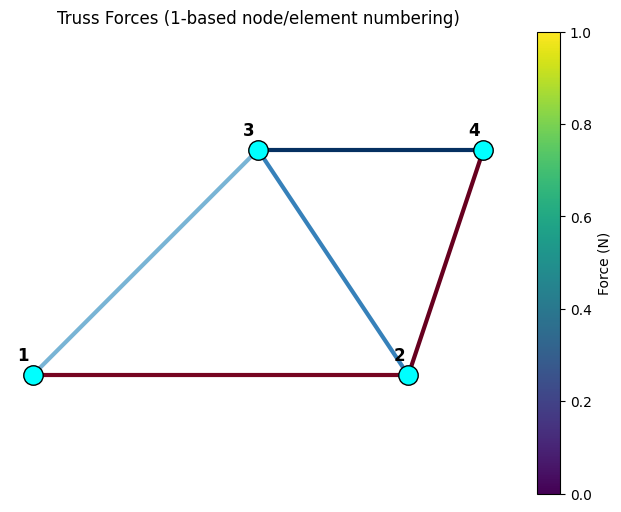

In [15]:
# Get visualization data from mesh
P = mesh.nodes  # Node coordinates
edges = mesh.elements  # All connectivity (1-based)

# Plot mesh with element forces
fig, ax = plt.subplots(figsize=(8, 6))
patch('Faces', edges, 'Vertices', P,
      'FaceVertexCData', N.data,  # Use underlying array
      'FaceColor', 'flat',
      'LineWidth', 3,
      'cmap', 'RdBu_r')

ax.plot(P[:, 0], P[:, 1], 'o', color='cyan',
        markeredgecolor='black', markersize=14)

# Label nodes with 1-based numbers
for inod, coords in mesh.iter_nodes():
    ax.text(coords[0]-20, coords[1]+20, str(inod),
            fontsize=12, fontweight='bold')

ax.axis('equal')
ax.axis('off')
ax.set_title('Truss Forces (1-based node/element numbering)')
plt.colorbar(ax.collections[0], ax=ax, label='Force (N)')
plt.show()

### Example 12: Different Element Types

In [16]:
# Triangular mesh (TRIA3 elements)
tri_coords = [[0, 0],        # Node 1
              [1, 0],        # Node 2
              [0.5, 0.866],  # Node 3
              [1.5, 0.866],  # Node 4
              [1, 1.732]]    # Node 5

tri_connectivity = [[1, 2, 3],  # Element 1
                    [2, 4, 3],  # Element 2
                    [3, 4, 5]]  # Element 3

tri_mesh = Mesh(tri_coords, tri_connectivity)  # Auto-detects TRIA3

print(f"Triangle mesh:")
print(f"  Element type: {tri_mesh.element_type}")
print(f"  Nodes per element: {tri_mesh.nodes_per_element}")
print(f"  DOFs per node: {tri_mesh.dofs_per_node}")
print(f"  Total DOFs: {tri_mesh.n_dofs}")

Triangle mesh:
  Element type: TRIA3
  Nodes per element: 3
  DOFs per node: 2
  Total DOFs: 10


### Example 13: Quad Mesh (QUAD4)

In [20]:
quad_mesh.elements

array([[1, 2, 5, 4],
       [2, 3, 6, 5]])

Quad mesh:
  Element type: QUAD4
  Nodes per element: 4


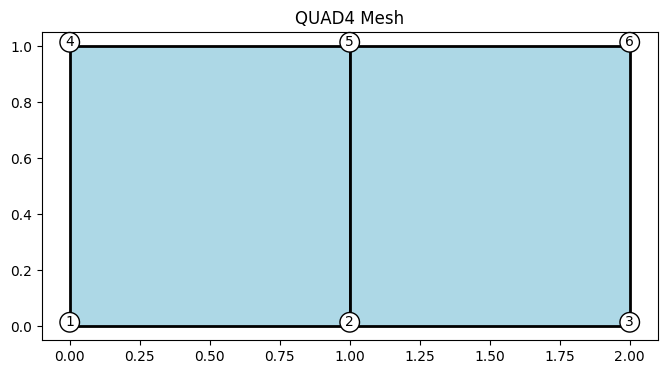

In [30]:
# Quad mesh
quad_coords = [[0, 0],      # Node 1
               [1, 0],      # Node 2
               [2, 0],      # Node 3
               [0, 1],      # Node 4
               [1, 1],      # Node 5
               [2, 1]]      # Node 6

quad_connectivity = [[1, 2, 5, 4],  # Element 1
                     [2, 3, 6, 5]]  # Element 2

quad_mesh = Mesh(quad_coords, quad_connectivity)  # Auto-detects QUAD4

print(f"Quad mesh:")
print(f"  Element type: {quad_mesh.element_type}")
print(f"  Nodes per element: {quad_mesh.nodes_per_element}")

# Visualize
fig, ax = plt.subplots(figsize=(8, 4))
P_quad = quad_mesh.nodes
faces = quad_mesh.elements

patch('Faces', faces, 'Vertices', P_quad,
      'FaceColor', 'lightblue',
      'EdgeColor', 'black',
      'LineWidth', 2)

# Label nodes
for inod, coords in quad_mesh.iter_nodes():
    ax.text(coords[0], coords[1], str(inod),
            fontsize=10, ha='center', 
            bbox=dict(boxstyle='circle,pad=0.2', facecolor='white'))

ax.set_aspect('equal')
ax.set_title('QUAD4 Mesh')
plt.show()

## Part 4: Practical FEM Example - Truss Analysis Workflow

Complete example showing natural workflow with 1-based indexing.

### Example 14: Complete Truss Analysis

In [34]:
# Step 1: Define mesh
coords = [[0, 0], [500, 0], [300, 300], [600, 300]]
connectivity = [[1, 2], [1, 3], [2, 3], [2, 4], [3, 4]]
mesh = Mesh(coords, connectivity)

# Step 2: Define element properties (1-based!)
areas = OneArray([100, 100, 120, 100, 150])  # mm²
E = 210000  # N/mm² (steel)

# Step 3: "Solve" (simulated results for demonstration)
forces = OneArray([6052.76, -5582.25, -7274.51, 6380.16, -9912.07])  # N

# Step 4: Calculate stresses
stresses = forces / areas  # Natural element-wise operation

# Step 5: Identify critical elements
print("Stress Analysis:")
print("=" * 50)
for iel, inodes, coords in mesh.iter_elements():
    stress = stresses[iel]
    force = forces[iel]
    area = areas[iel]
    
    status = "TENSION" if force > 0 else "COMPRESSION"
    
    print(f"Element {iel} (nodes {inodes}):")
    print(f"  Force: {force:8.2f} N ({status})")
    print(f"  Area:  {area:8.2f} mm²")
    print(f"  Stress: {stress:7.2f} MPa")
    print()

# Find maximum stress
max_stress_idx = np.argmax(np.abs(stresses.data)) + 1  # Convert to 1-based
print(f"Critical element: {max_stress_idx}")
print(f"Maximum stress: {stresses[max_stress_idx]:.2f} MPa")

Stress Analysis:
Element 1 (nodes [1 2]):
  Force:  6052.76 N (TENSION)
  Area:    100.00 mm²
  Stress:   60.53 MPa

Element 2 (nodes [1 3]):
  Force: -5582.25 N (COMPRESSION)
  Area:    100.00 mm²
  Stress:  -55.82 MPa

Element 3 (nodes [2 3]):
  Force: -7274.51 N (COMPRESSION)
  Area:    120.00 mm²
  Stress:  -60.62 MPa

Element 4 (nodes [2 4]):
  Force:  6380.16 N (TENSION)
  Area:    100.00 mm²
  Stress:   63.80 MPa

Element 5 (nodes [3 4]):
  Force: -9912.07 N (COMPRESSION)
  Area:    150.00 mm²
  Stress:  -66.08 MPa

Critical element: 5
Maximum stress: -66.08 MPa


### Example 15: Visualize Stress Results

AttributeError: 'Mesh' object has no attribute 'elements_iter'

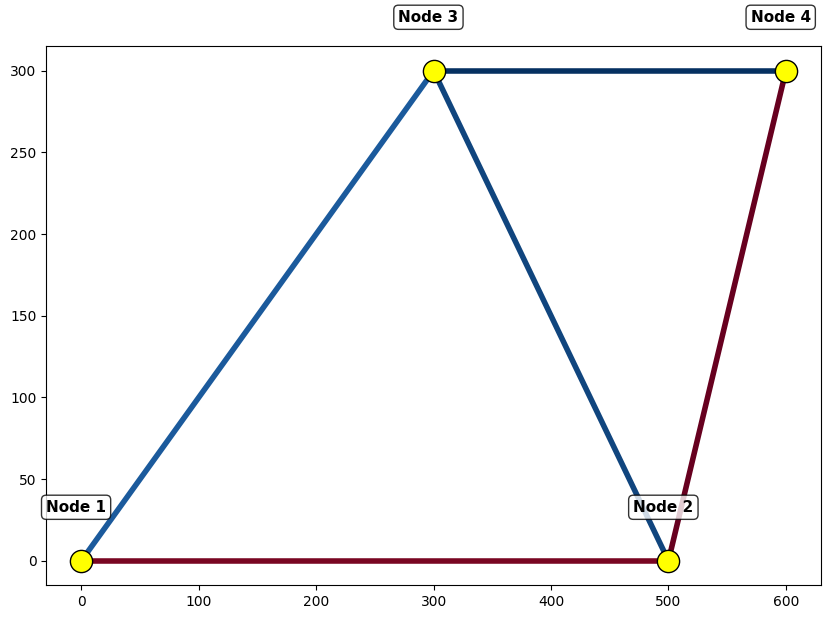

In [38]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot mesh colored by stress
P = mesh.nodes
edges = mesh.elements

patch('Faces', edges, 'Vertices', P,
      'FaceVertexCData', stresses.data,
      'FaceColor', 'flat',
      'LineWidth', 4,
      'cmap', 'RdBu_r')

# Plot nodes
ax.plot(P[:, 0], P[:, 1], 'o', color='yellow',
        markeredgecolor='black', markersize=16, linewidth=2)

# Label nodes
for inod, coords in mesh.iter_nodes():
    ax.text(coords[0]-30, coords[1]+30, f'Node {inod}',
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Label elements with stress values
for iel in mesh.elements_iter():
    nodes = mesh.get_element_nodes(iel)
    # Calculate element midpoint
    coords1 = mesh.get_node(nodes[0])
    coords2 = mesh.get_node(nodes[1])
    mid = (coords1 + coords2) / 2
    
    stress = stresses[iel]
    ax.text(mid[0], mid[1], f'{stress:.1f}',
            fontsize=9, ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

ax.axis('equal')
ax.axis('off')
ax.set_title('Truss Stress Analysis (MPa)', fontsize=14, fontweight='bold')
plt.colorbar(ax.collections[0], ax=ax, label='Stress (MPa)')
plt.tight_layout()
plt.show()

## Summary

### OneArray
- **Purpose**: 1-based indexing for element/node result arrays
- **Usage**: `N = OneArray([...])`
- **Access**: `N[1]`, `N[3]`, `N[[1,3,5]]`
- **Benefits**: Natural iteration, no `[iel-1]` gymnastics

### Mesh
- **Purpose**: Complete FEM mesh with 1-based node/element numbering
- **Key methods**:
  - `get_node(i)` - Get coordinates of node i
  - `get_element_nodes(iel)` - Get connectivity for element iel
  - `dofs_for_node(i)` - Get DOF indices for node i
  - `nodes_iter()`, `elements_iter()` - Iterate with 1-based numbers
- **Element types**: ROD, BEAM, TRIA3, QUAD4, TETRA4, HEXA8

### Best Practices
1. Use `Mesh` for geometry and connectivity
2. Use `OneArray` for per-element/per-node results
3. Combine with `patch()` for visualization
4. Iterate using `mesh.elements_iter()` for natural 1-based loops
5. Access underlying `.data` when you need raw NumPy arrays